Machine Learning modelimizi ve scaler nesnemizi serialize Ederek kaydetme

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

#1 hasta
#0 sağlıklı
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


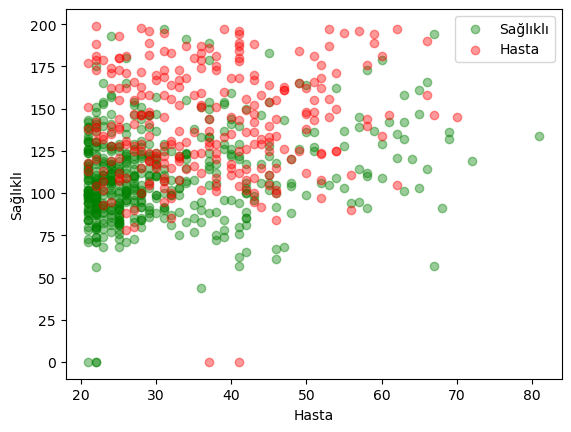

In [8]:
seker_hastalari=df[df.Outcome==1]
saglikli_hastalar=df[df.Outcome==0]

plt.scatter(saglikli_hastalar.Age, saglikli_hastalar.Glucose, color="green",label="Sağlıklı",alpha=0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red",label="Hasta",alpha=0.4)
plt.xlabel("Hasta")
plt.ylabel("Sağlıklı")
plt.legend()
plt.show()

In [12]:
#Burada bağımlı değişkenimizi ayırıyoruz
y=df.Outcome.values
x_ham_veri=df.drop(["Outcome"],axis=1)
#Bağımsız değişkenlerimizi normalize ediyoruz
sc=MinMaxScaler()
x_ham_veri=sc.fit_transform(x_ham_veri)
#test train yapıyororuz
x_train, x_test, y_train, y_test = train_test_split(x_ham_veri,y,test_size=0.1,random_state=1)


In [14]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print("Knn 3 değeri için sonuç : ",knn.score(x_test,y_test))


Knn 3 değeri için sonuç :  0.8311688311688312


Burada Modelimizi ve Scale pickle a çeviriyoruz

In [15]:
import pickle

In [18]:
model_dosyasi="knnmodel.pickle"
pickle.dump(knn,open(model_dosyasi,'wb'))
scaler_dosyasi="sc.pickle"
pickle.dump(sc,open(scaler_dosyasi,'wb'))
#burada model ve scaler ı serialize ettik.